In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Churn_Modelling.csv")
data.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1


In [3]:
data.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
x = data.iloc[:,:-1]
y = data["Exited"]

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [7]:
x.shape

(10000, 8)

# Model

In [8]:
import tensorflow 

In [9]:
from keras.layers import Dense
from keras.models import Sequential

In [10]:
ann = Sequential()

In [11]:
# Num of hidden layers:- [6 nodes, 4 nodes, 2 nodes, 1 node for binary classification]
# Num of inputs : [8]
# Activation Function:- ['rule':best for hidden layers fast and efficient, 'sigmoid':Output for binary classification(0/1) ]

ann.add(Dense(6, input_dim=8, activation="relu"))
ann.add(Dense(4, activation="relu"))
ann.add(Dense(2, activation="relu"))
ann.add(Dense(1, activation="sigmoid"))

In [12]:
# Optimizer: for weights update. ['adam': Most common and fast]
# Loss Function: ['binary_crossentropy': Binary classification problems (0 or 1)]

ann.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

In [13]:
x_train.shape

(8000, 8)

In [14]:
# Batch Size: ['batch_size':  How many simples train in 1 time.]
# No. of Epochs : How many times the model should be trained on the entire dataset.

ann.fit(x_train, y_train, batch_size=100, epochs=50)

Epoch 1/50
80/80 [==============================] - 1s 2ms/step - loss: 0.6162 - accuracy: 0.7945
Epoch 2/50
80/80 [==============================] - 0s 3ms/step - loss: 0.5283 - accuracy: 0.7945
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.7945
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.7945
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4641 - accuracy: 0.7945
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.7945
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.7945
Epoch 8/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.7945
Epoch 9/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.7945
Epoch 10/50
80/80 [==============================] - 0s 6ms/step - loss: 0.4403 - accuracy: 0.7945
Epoch 11/50
80/80 [

In [15]:
prd = ann.predict(x_test)
prd_data = []
for i in prd:
    # print(i)
    if i[0] > 0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

In [16]:
prd1 = ann.predict(x_train)
prd_data1 = []
for i in prd1:
    if i[0] > 0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test, prd_data)*100

83.55

In [19]:
accuracy_score(y_train, prd_data1)*100

83.2375

# Hyper Parameter Tuning

In [22]:
# Some parameters where we apply haperparameter tuning. 

# 1. Number of hidden layers
# 2. optimizer
# 3. batch_size
# 4. Epochs

# Identify Overfitting.
## 1. EarlyStopping

In [23]:
from keras.callbacks import EarlyStopping

In [24]:
ann1 = Sequential()

In [25]:
ann1.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

In [26]:
ann1.fit(x_train, y_train, batch_size=100, epochs=50, validation_data=(x_test,y_test), callbacks=EarlyStopping())

Epoch 1/50
80/80 [==============================] - 1s 7ms/step - loss: 3.3930 - accuracy: 0.1649 - val_loss: 3.3276 - val_accuracy: 0.1525


In [27]:
train_accuracy = ann1.history.history["accuracy"]
test_accuracy = ann1.history.history["val_accuracy"]

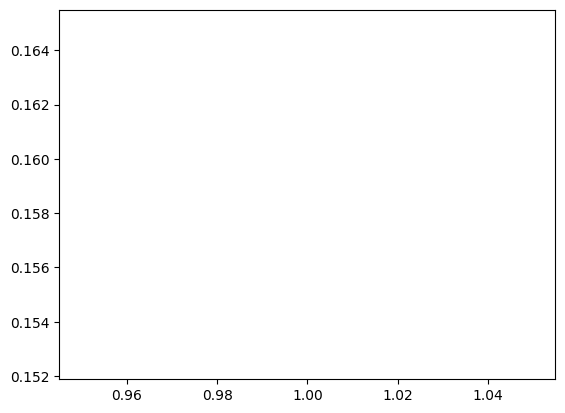

In [28]:
plt.plot([i for i in range(1,2)], train_accuracy)
plt.plot([i for i in range(1,2)], test_accuracy, c='red')
plt.show()

## 2. Regularization

In [29]:
from keras.regularizers import L1, L2

In [30]:
ann2 = Sequential()

In [31]:
ann2.add(Dense(6, input_dim=8, activation="relu", kernel_regularizer=L2(l2=0.01)))
ann2.add(Dense(4, activation="relu", kernel_regularizer=L2(l2=0.01)))
ann2.add(Dense(2, activation="relu", kernel_regularizer=L2(l2=0.01)))
ann2.add(Dense(1, activation="sigmoid"))

In [32]:
ann2.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

In [33]:
ann2.fit(x_train, y_train, batch_size=100, epochs=50, validation_data=(x_test,y_test), callbacks=EarlyStopping())

Epoch 1/50
80/80 [==============================] - 2s 8ms/step - loss: 0.8401 - accuracy: 0.5576 - val_loss: 0.7741 - val_accuracy: 0.7265


In [34]:
train_accuracy1 = ann2.history.history["accuracy"]
test_accuracy1 = ann2.history.history["val_accuracy"]

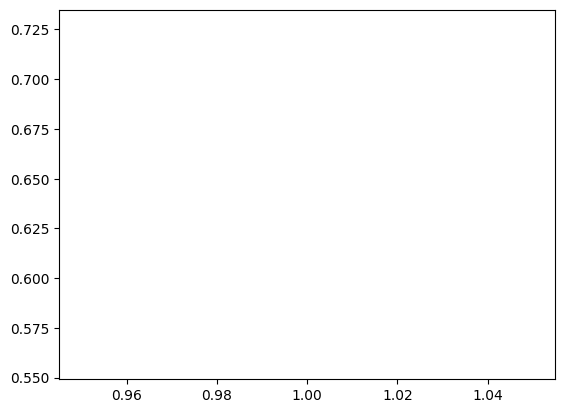

In [35]:
plt.plot([i for i in range(1,2)], train_accuracy1)
plt.plot([i for i in range(1,2)], test_accuracy1, c='red')
plt.show()

## 3. Batch Normalization

In [36]:
from keras.layers import BatchNormalization

In [37]:
ann3 = Sequential()

In [38]:
ann3.add(Dense(6, input_dim=8, activation="relu", kernel_regularizer=L2(l2=0.01)))
ann3.add(BatchNormalization())
ann3.add(Dense(4, activation="relu", kernel_regularizer=L2(l2=0.01)))
ann3.add(BatchNormalization())
ann3.add(Dense(2, activation="relu", kernel_regularizer=L2(l2=0.01)))
ann3.add(BatchNormalization())
ann3.add(Dense(1, activation="sigmoid"))

In [39]:
ann3.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

In [40]:
ann3.fit(x_train, y_train, batch_size=100, epochs=50, validation_data=(x_test,y_test), callbacks=EarlyStopping())

Epoch 1/50
80/80 [==============================] - 3s 8ms/step - loss: 0.8699 - accuracy: 0.4004 - val_loss: 0.7615 - val_accuracy: 0.4900


In [41]:
prd2 = ann3.predict(x_test)
prd_data2 = []
for i in prd2:
    # print(i)
    if i[0] > 0.5:
        prd_data2.append(1)
    else:
        prd_data2.append(0)

In [42]:
prd2 = ann3.predict(x_train)
prd_data3 = []
for i in prd2:
    if i[0] > 0.5:
        prd_data3.append(1)
    else:
        prd_data3.append(0)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test, prd_data2)*100

49.0

In [45]:
accuracy_score(y_train, prd_data3)*100

50.4375

## 4. Dropout Layer

In [46]:
from keras.layers import Dropout

In [47]:
ann4 = Sequential()

In [48]:
ann4.add(Dense(6, input_dim=8, activation="relu", kernel_regularizer=L2(l2=0.01)))
ann4.add(Dropout(0.5))
ann4.add(Dense(4, activation="relu", kernel_regularizer=L2(l2=0.01)))
ann4.add(Dropout(0.5))
ann4.add(Dense(2, activation="relu", kernel_regularizer=L2(l2=0.01)))
ann4.add(Dropout(0.5))
ann4.add(Dense(1, activation="sigmoid"))

In [49]:
ann4.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

In [50]:
ann4.fit(x_train, y_train, batch_size=100, epochs=50, validation_data=(x_test,y_test), callbacks=EarlyStopping())

Epoch 1/50
80/80 [==============================] - 2s 8ms/step - loss: 0.7871 - accuracy: 0.7945 - val_loss: 0.7436 - val_accuracy: 0.8035


In [51]:
prd = ann4.predict(x_test)
prd_data = []
for i in prd:
    # print(i)
    if i[0] > 0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

In [52]:
prd1 = ann4.predict(x_train)
prd_data1 = []
for i in prd1:
    if i[0] > 0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)

In [53]:
accuracy_score(y_test, prd_data)*100

80.35

In [54]:
accuracy_score(y_train, prd_data1)*100

79.45

# Prediction

In [55]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,-0.564197,-0.660018,-0.695982,0.324119,0.807737,-1.547768,-1.030670,-1.013811
4684,-0.284834,0.388871,-1.387538,-1.225848,0.807737,0.646092,0.970243,0.804921
1731,-0.512463,0.484225,-0.350204,-1.225848,0.807737,0.646092,-1.030670,-0.722147
4742,-1.495407,1.914528,1.032908,0.683816,0.807737,0.646092,0.970243,1.227481
4521,-0.936681,-1.136786,0.687130,0.777477,-0.911583,0.646092,0.970243,0.253524
...,...,...,...,...,...,...,...,...
6412,-0.502117,1.342407,-0.004426,0.349118,-0.911583,-1.547768,0.970243,-0.957298
8285,-0.429689,-1.327494,1.724464,-1.225848,-0.911583,-1.547768,0.970243,0.170498
7853,0.822271,0.770285,0.687130,-1.225848,-0.911583,0.646092,-1.030670,-1.160142
1095,0.429093,-0.946079,-0.350204,-1.225848,-0.911583,0.646092,-1.030670,-0.405759


In [56]:
prd = ann.predict([[-0.564197,-0.660018,-0.695982,0.324119,0.807737,-1.547768,-1.030670,-1.013811]])
prd_data = []
for i in prd:
    if i[0] > 0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)
prd_data

[0]

In [57]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64